In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def sq_sum(xs):
    return sum(map(lambda x: x**2, xs))

def seq_err(xs):
    n    = len(xs)
    avg  = np.average(xs)
    offs = map(lambda x: x - avg, xs)
    
    return np.sqrt(sq_sum(list(offs)) / (n * n - 1))

In [43]:
def read_data(path):
    out = []
    
    with open(path, 'r') as f:
        for l in f:
            if(len(l) < 2): continue # skip empty lines
            formatted = l.replace(',', '.').rstrip('\n')
            out.append(float(formatted))
            
        f.close()
    
    return out

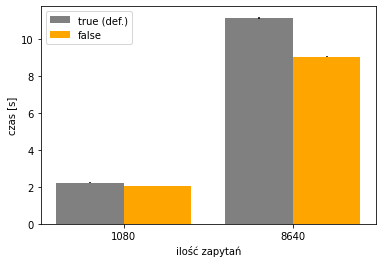

In [47]:
# inp_len: 1080
off      = read_data("./time-off.out")   # [2.32, 2.29, 2.41, 2.27, 2.19, 2.28, 2.11, ...]
on       = read_data("./time-on.out")    # [2.07, 1.99, 2.19, 2.03, 2.24, 1.98, 1.99, ...]

# inp_len: 8640
off_2    = read_data("./time-off-2.out") # [11.47, 11.69, 11.58, 11.05, 11.12, 10.89, 11.39, ...]
on_2     = read_data("./time-on-2.out")  # [8.98, 9.24, 9.07, 9.05, 8.76, 9.11, 9.17, ...]

off_err  = seq_err(off); off_err_2 = seq_err(off_2) 
on_err   = seq_err(on) ; on_err_2  = seq_err(on_2)

data_off = (np.average(off), np.average(off_2))
data_on  = (np.average(on), np.average(on_2))
ind      = np.arange(2)
w        = 0.4

plt.bar(ind - w/2, data_off, w, yerr=(off_err, off_err_2), color='gray', label="true (def.)")
plt.bar(ind + w/2, data_on, w, yerr=(on_err, on_err_2), color='orange', label="false")

plt.xticks(ind, ("1080", "8640"))
plt.ylabel("czas [s]")
plt.xlabel("ilość zapytań")
plt.legend()

plt.savefig("wyd-sync.jpg")

In [46]:
read_data("./time-on.out")

[2.07,
 1.99,
 2.19,
 2.03,
 2.24,
 1.98,
 1.99,
 2.06,
 1.94,
 2.06,
 2.12,
 1.97,
 1.96,
 2.16,
 2.04,
 2.09,
 1.96,
 1.92,
 1.98,
 1.96,
 1.96,
 1.95,
 1.98,
 2.14,
 2.29,
 2.05,
 2.1,
 2.16,
 2.13,
 2.01,
 2.0,
 1.93,
 2.04,
 1.94,
 1.98,
 2.0,
 2.06,
 1.95,
 1.96,
 2.01,
 2.01,
 1.99,
 2.05,
 2.09,
 2.05,
 1.96,
 2.0,
 2.06,
 2.11,
 2.03]